# Data processing

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split,cross_val_score,ShuffleSplit,RandomizedSearchCV
from sklearn.metrics import classification_report,accuracy_score
from sklearn.model_selection import learning_curve,ShuffleSplit
from sklearn.pipeline import make_pipeline
from sklearn.datasets import load_breast_cancer 
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import argparse
import graphviz

In [2]:
# 载入 cancer 数据集，然后进行训练集和测试集的划分，75%数据作为训练集，其余25%作为测试集
print("[INFO] loading data...")
dataset = load_breast_cancer() 
(trainX, testX, trainY, testY) = train_test_split(dataset.data, dataset.target, random_state=3, test_size=0.25)


[INFO] loading data...


In [3]:
data = pd.DataFrame(data=dataset, columns=dataset.feature_names)
data['Class'] = dataset.target

# print(boston.DESCR)
data.info()

# looking into our data, there are no outliers
# data.isnull().sum()

data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   mean radius              0 non-null      object
 1   mean texture             0 non-null      object
 2   mean perimeter           0 non-null      object
 3   mean area                0 non-null      object
 4   mean smoothness          0 non-null      object
 5   mean compactness         0 non-null      object
 6   mean concavity           0 non-null      object
 7   mean concave points      0 non-null      object
 8   mean symmetry            0 non-null      object
 9   mean fractal dimension   0 non-null      object
 10  radius error             0 non-null      object
 11  texture error            0 non-null      object
 12  perimeter error          0 non-null      object
 13  area error               0 non-null      object
 14  smoothness error         0 non-null      o

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Class
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


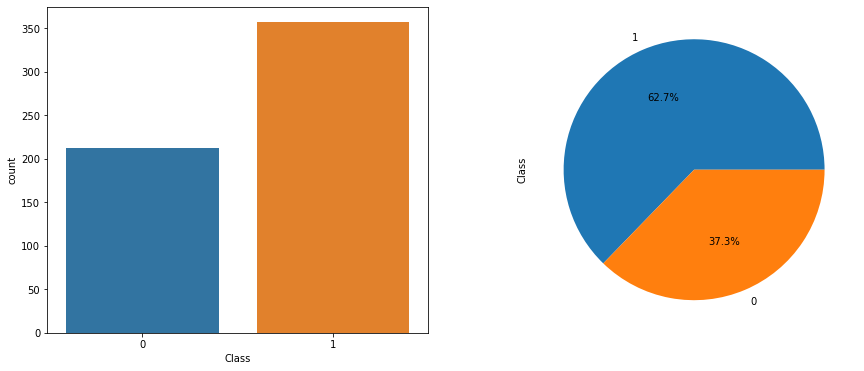

In [4]:
import seaborn as sns
fig, ax=plt.subplots(1,2,figsize=(15,6))
_ = sns.countplot(x=data.iloc[:, -1], data=data, ax=ax[0])
_ = data.iloc[:, -1].value_counts().plot.pie(autopct="%1.1f%%", ax=ax[1])
